# 深層学習ライブラリ Keras を使って手書き数字を分類しよう
---

深層学習ライブラリ Keras を使って手書き数字のデータセット MNIST を分類するニューラルネットワークを構築しましょう。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での利用は避けてください。

**本演習の目的**
- Kerasに慣れる
- 手書き数字のデータセット MNIST を分類する

## ライブラリのインストール

まずはじめに、本演習で利用するライブラリのインポートを行います。

- [numpy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント

In [1]:
import tensorflow as tf
import keras

import numpy as np
import matplotlib.pyplot as plt

# 各レイヤーで使用するものをインポートします。
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation

/home/zero2one/miniconda3/envs/zcar01/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:455: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zero2one/miniconda3/envs/zcar01/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:456: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zero2one/miniconda3/envs/zcar01/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:457: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zero2one/miniconda3/envs/zcar01

In [2]:
print(tf.__version__)
print(keras.__version__)

1.1.0
1.2.0


## データの読み込み

`from keras.datasets import mnist` でMNISTのデータセットを読み込むことができます。

読み込んだMNISTを使う準備ができました。

次に、読み込んだMNISTを訓練データとテストデータにデータセットを分割します。

```py
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
```

それでは下記のセルを実行してみましょう。

In [3]:
# mnistデータセットを準備します。
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

14770176/15296311 [===========================>..] - ETA: 0s

ここで4つの変数に訓練データとテストデータを格納しました。

* X_train: 訓練データ
* Y_train: 訓練データ用の正解ラベル
* X_test: テストデータ
* Y_test: テストデータ用の正解ラベル

それぞれの配列を確認しましょう。

In [4]:
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


**訓練データ**<br>
訓練データの中身を確認してみましょう。下のセルはランダムに一枚の画像を表示するプログラムです。何度か実行してみてください。

数字：0


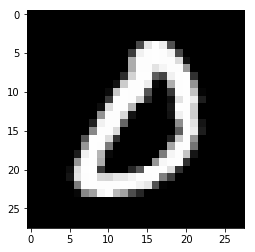

In [5]:
num = np.random.randint(0, len(X_train))
plt.imshow(X_train[num].reshape(28, 28), cmap='gray')
print("数字：{}".format(Y_train[num]))

**正解ラベル**<br>
訓練データから最初の10個の正解ラベルを確認してみましょう。

In [6]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

<img src="./img/label.png">

Kerasでは One-Hot Encodingを行うための関数が用意されています。下のセルのプログラムを実行して最初から10個の正解ラベルをみてみましょう。

In [7]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## ニューラルネットワークのモデルを構築

Sequential モデルを構築します。Sequential モデルは層を積み重ねたモデルのことをさします。

<img src="./img/keras_mnist_model.png">

**入力層**

- ユニット数: 784個

`Flatten(input_shape=(28, 28))` と記述することで 784 (28×28) の入力層が準備されます。


**中間層**
- ユニット数: 128個
- Dense(128, activation='relu')： 活性化関数がReluの全結合層を作成します。


**出力層**
- ユニット数: 10個
- 　Dense(10, activation='softmax')： 活性化関数がSoftmaxの全結合層を作成します。

Sequential モデルを構築する際は層（レイヤー）を積み重ねていきます。

具体的には、

* Dense： 通常の全結合ニューラルネットワークレイヤー
* Flatten： 入力を平坦化
* Activation： 活性化関数

などがあります。

Denseの場合下記になります。

**[Coreレイヤー](https://keras.io/ja/layers/core/)**

```py
keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```

**重みの初期値**

各層の重みは`kernel_initializer` で指定できます。デフォルトは`glorot_uniform`です。

では、実際にモデルを構築してみましょう。

In [8]:
# Sequential モデルを構築します。
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

## モデルのコンパイル

構築したモデルを訓練させるにはいくつかの設定をコンパイル時に追加する必要があります。

* オプティマイザ（optimizer）：最適化アルゴリズムを指定します。（sgdやadam、RMSpropなどがあります。）
* 目的関数（loss function） ：訓練がどの程度正確に進んでいるか示す指標です。
* メトリクス（metrics） ：訓練とテスト結果を監視します。下記ではaccuracy （正解率）を記録しています。

In [9]:
# 評価指標（metrics）として accuracy を追加しています。
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## モデルの確認

構築したモデルを確認するには`model.summary()`を実行します。モデル全体の構成や各層におけるパラメータ数などを一目で確認することができるため便利です。

In [10]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
flatten_1 (Flatten)              (None, 784)           0           flatten_input_1[0][0]            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 128)           100480      flatten_1[0][0]                  
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            1290        dense_1[0][0]                    
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
____________________________________________________________________________________________________


## モデルを学習させてみよう

`model.fit` と記述することで作成した Sequential モデル を学習できます。

ここではエポック数を10、バッチサイズを128としました。

In [11]:
# エポック=10で学習します。
epochs=10
fit = model.fit(X_train, y_train, batch_size=128, nb_epoch=epochs, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.3652 - acc: 0.8994 - val_loss: 0.2005 - val_acc: 0.9410
Epoch 2/10
60000/60000 [==============================] - 3s - loss: 0.1676 - acc: 0.9522 - val_loss: 0.1401 - val_acc: 0.9600
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 0.1200 - acc: 0.9662 - val_loss: 0.1101 - val_acc: 0.9671
Epoch 4/10
60000/60000 [==============================] - 3s - loss: 0.0935 - acc: 0.9729 - val_loss: 0.0973 - val_acc: 0.9710
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.0757 - acc: 0.9785 - val_loss: 0.0869 - val_acc: 0.9735
Epoch 6/10
60000/60000 [==============================] - 3s - loss: 0.0621 - acc: 0.9820 - val_loss: 0.0856 - val_acc: 0.9747
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.0525 - acc: 0.9846 - val_loss: 0.0779 - val_acc: 0.9769
Epoch 8/10
60000/60000 [==============================] - 3s 

## エポックごとのロスを確認しよう

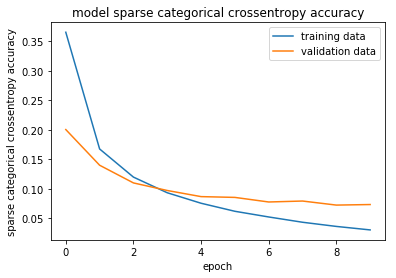

In [12]:
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model sparse categorical crossentropy accuracy')
plt.ylabel('sparse categorical crossentropy accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

## エポックごとの正解率を確認しよう

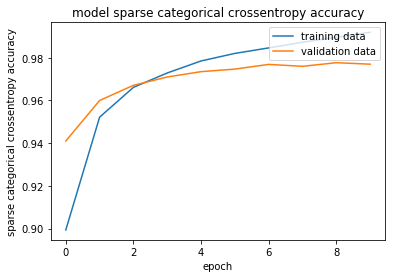

In [13]:
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.title('model sparse categorical crossentropy accuracy')
plt.ylabel('sparse categorical crossentropy accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

## モデルを評価しよう

In [14]:
# 精度を評価します。戻り値はそれぞれloss、accuracyです。
loss, accuracy = model.evaluate(X_test, y_test)
print('loss', loss)
print('accuracy', accuracy)

 9792/10000 [============================>.] - ETA: 0sloss 0.07353519459106028
accuracy 0.977
